In [11]:
### Importing packages 

import numpy as np
import matplotlib.pyplot as plt
import cPickle as p
import glob
import os

In [18]:
### Size of the images

plt.rcParams['figure.figsize']=(40,40)
plt.rcParams['font.size']=40
plt.rcParams['figure.dpi']=200

In [14]:
### Creating a list with all the data files in it

List = glob.glob(os.path.join('./data/', '*.p'))

In [5]:
### Function that performs the two point calculation

def TwoPointFuct(Data,rArray,NumAngle,dx,dy):
    TwoPoint = []
    Zmean=Data.mean()
    Zvar=Data.var()
    angleMax = 2 * np.pi
    dangle = angleMax/NumAngle
    angleindex = np.arange(NumAngle)
    angle = angleindex * dangle
    Nx,Ny = Data.shape
    i_index = np.arange(Nx)
    j_index = np.arange(Ny)
    Nr, = rArray.shape
    for rad in rArray:
        for ang in angle:
            dxi = (rad * np.cos(ang))
            dyj = (rad * np.sin(ang))
            di = dxi / dx
            dj = dyj / dy
            sum = 0
            for i in i_index:
                for j in j_index:
                    i2=(i+int(round(di)))%Nx
                    j2=(j+int(round(dj)))%Ny
                    sum += Data[i,j] * Data[i2,j2]
            TwoPoint.append(sum/(Nx * Ny))
    tp_2d=(np.array(TwoPoint).reshape(Nr,NumAngle)-Zmean**2)/Zvar
    return tp_2d


In [6]:
### Perform the calculation and saving the array to a text file for any given number of files

for i in List[0:2]:
    

    Z = p.load(open(i))

    Zxy_data = Z['z']["data"]
    Zxy_bounds = Z['z']["bounds"]
    Nx,Ny = Zxy_data.shape

    Lx = Zxy_bounds[1] - Zxy_bounds[0]
    Ly = Zxy_bounds[3] - Zxy_bounds[2]

    Xmin = Zxy_bounds[0]
    Ymin = Zxy_bounds[2]

    i_index = np.arange(Nx)
    j_index = np.arange(Ny)

    dx = Lx/Nx
    dy = Ly/Ny

    Xi = i_index * dx + Xmin + dx/2
    Yj = j_index * dy + Ymin + dy/2

    Nr = 50
    rMax = Lx/2

    dr = rMax / Nr
    rindex = np.arange(Nr)
    r = rindex * dr 
    tp_2d = TwoPointFuct(Zxy_data,r,100,dx,dy)
    np.savetxt(i+".txt",tp_2d)

In [7]:
### Set the file name to a variable

filename=List[0]

In [8]:
### Loading data from a specific file

Z = p.load(open(i))

Zxy_data = Z['z']["data"]
Zxy_bounds = Z['z']["bounds"]
Nx,Ny = Zxy_data.shape

tp_2d = np.loadtxt(filename+'.txt')

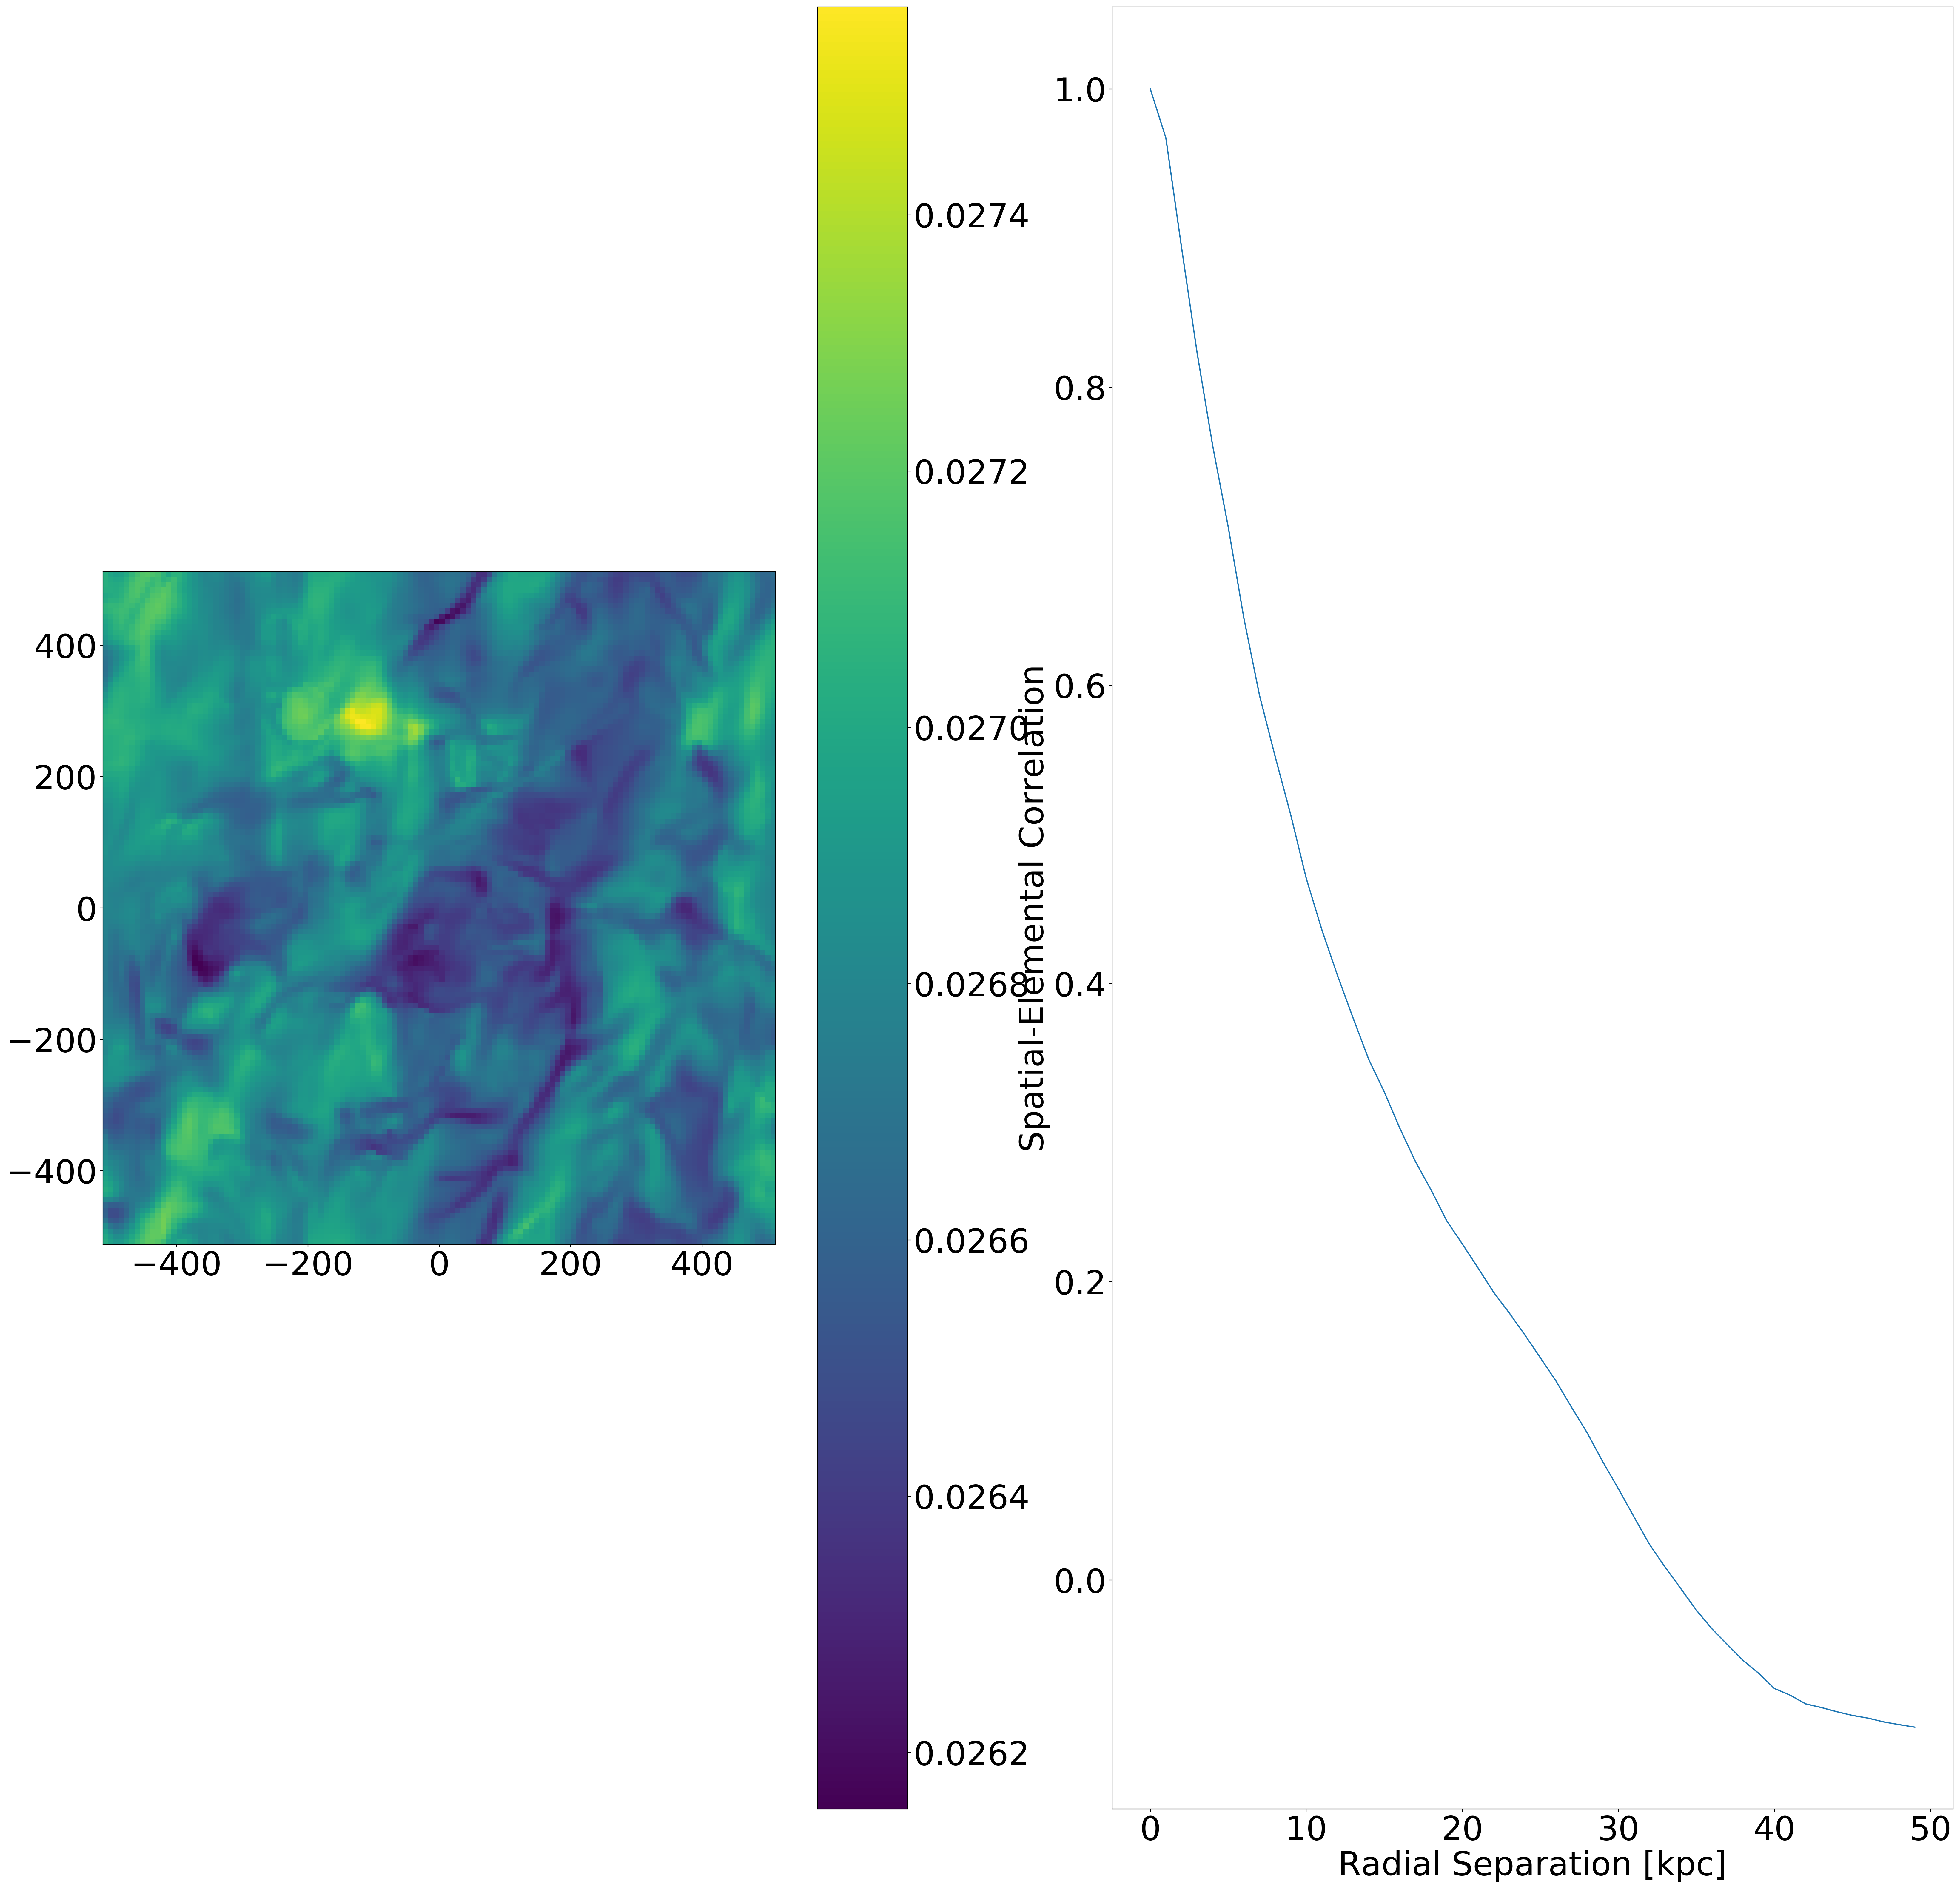

In [24]:
### Plotting the data

plt.subplot(121)
plt.imshow(Zxy_data,extent=Zxy_bounds)
plt.colorbar()
plt.subplot(122)
plt.xlabel("Radial Separation [kpc]")
plt.ylabel("Spatial-Elemental Correlation")
plt.plot(tp_2d.mean(axis=1))
plt.savefig("Plots/plot.png")